In [2]:
# Install latest Tensorflow build
%load_ext tensorboard

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


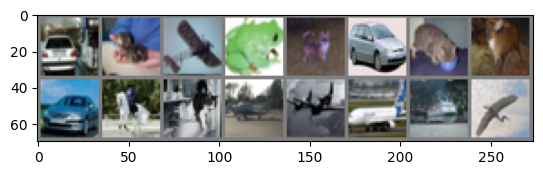

car   cat   plane frog  dog   car   cat   deer  car   horse cat   plane plane plane ship  bird 


In [5]:

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
# ##################################################################################################
# Aufgabe 2
# ##################################################################################################

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)         # 32x32 -> 30x30
        self.conv2 = nn.Conv2d(8, 16, 3)        # 30x30 -> 28x28
        self.pool = nn.MaxPool2d(2, 2)          # 28x28 -> 14x14
        self.conv3 = nn.Conv2d(16, 32, 3)       # 14x14 -> 12x12
        self.conv4 = nn.Conv2d(32, 64, 3)       # 12x12 -> 10x10
                                                # 10x10 -> 5x5
        self.fc1 = nn.Linear(64 * 5 * 5, 4096)
        self.fc2 = nn.Linear(4096, 1000)
        self.fc3 = nn.Linear(1000, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
# set device to cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
print(device)

cuda


In [9]:
writer = SummaryWriter()

for epoch in range(10):  # loop over the dataset multiple times

    print("Epoch:", epoch, flush=True)
    print("Batches:", len(trainloader))

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 0:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}', flush=True)
            running_loss = 0

writer.flush()

print('Finished Training')

Epoch: 0
Batches: 3125


MIOpen(HIP): Warning [SQLiteBase] Missing system database file: gfx1030_20.kdb Performance may degrade. Please follow instructions to install: https://github.com/ROCmSoftwarePlatform/MIOpen#installing-miopen-kernels-package


[1,     1] loss: 0.001
[1,    21] loss: 0.023
[1,    41] loss: 0.023
[1,    61] loss: 0.023
[1,    81] loss: 0.023
[1,   101] loss: 0.023
[1,   121] loss: 0.023
[1,   141] loss: 0.023
[1,   161] loss: 0.023
[1,   181] loss: 0.023
[1,   201] loss: 0.023
[1,   221] loss: 0.023
[1,   241] loss: 0.023
[1,   261] loss: 0.023
[1,   281] loss: 0.023
[1,   301] loss: 0.023
[1,   321] loss: 0.023
[1,   341] loss: 0.023
[1,   361] loss: 0.023
[1,   381] loss: 0.023
[1,   401] loss: 0.023
[1,   421] loss: 0.023
[1,   441] loss: 0.023
[1,   461] loss: 0.023
[1,   481] loss: 0.023
[1,   501] loss: 0.023
[1,   521] loss: 0.023
[1,   541] loss: 0.023
[1,   561] loss: 0.023
[1,   581] loss: 0.023
[1,   601] loss: 0.023
[1,   621] loss: 0.023
[1,   641] loss: 0.023
[1,   661] loss: 0.023
[1,   681] loss: 0.023
[1,   701] loss: 0.023
[1,   721] loss: 0.023
[1,   741] loss: 0.023
[1,   761] loss: 0.023
[1,   781] loss: 0.023
[1,   801] loss: 0.023
[1,   821] loss: 0.023
[1,   841] loss: 0.023
[1,   861] 

# Aufgabe 3 / 4

CPU                | Nvidia 1050  | Nvidia 3060    |
-------------------|------------- | -------------- |
26 min 6 s (colab) | 3 min 54 s   | 1 min 3 s      |
4 min 14 s (lokal) |              |                |

In [10]:
# ##################################################################################################
# Aufgabe 5
# ##################################################################################################

correct              = 0
total                = 0
correct_top_3        = 0

correct_pred = {classname: 0 for classname in classes}
total_pred   = {classname: 0 for classname in classes}

ground_truths = []
predictions   = []

wrong_top_3 = []

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for i, data in enumerate(testloader):
        images, labels = data
        labels = labels.to(device)

        outputs = net(images.to(device))

        for i in range(len(outputs)):
            predictions.append(outputs[i].cpu().numpy())
            ground_truths.append(labels[i].cpu().numpy())

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Top-3 accuracy
        _, predicted_top3 = torch.topk(outputs, 3, 1)
        for i in range(len(predicted_top3)):
            if labels[i] in predicted_top3[i]:
                correct_top_3 += 1
                correct_pred[classes[labels[i]]] += 1
            else:
                wrong_top_3.append((images[i], labels[i], predicted[i]))

        for i in range(len(predicted)):
            total_pred[classes[labels[i]]] += 1

ground_truths = np.array(ground_truths)
predictions   = np.array(predictions)

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'Top-3 accuracy of the network on the 10000 test images: {100 * correct_top_3 // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Top3 Accuracy for class: {classname:6s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 63 %
Top-3 accuracy of the network on the 10000 test images: 88 %
Top3 Accuracy for class: plane  is 88.4 %
Top3 Accuracy for class: car    is 92.0 %
Top3 Accuracy for class: bird   is 88.8 %
Top3 Accuracy for class: cat    is 92.5 %
Top3 Accuracy for class: deer   is 82.3 %
Top3 Accuracy for class: dog    is 86.6 %
Top3 Accuracy for class: frog   is 91.8 %
Top3 Accuracy for class: horse  is 88.5 %
Top3 Accuracy for class: ship   is 84.6 %
Top3 Accuracy for class: truck  is 85.5 %


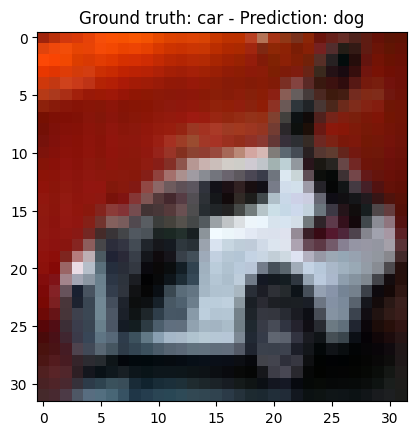

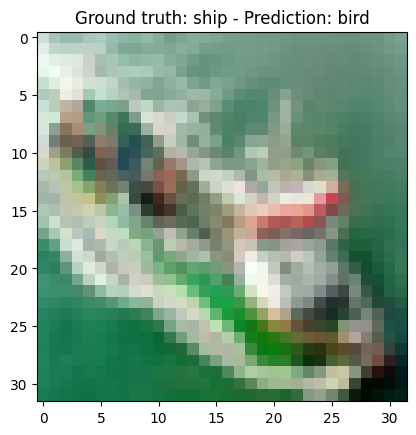

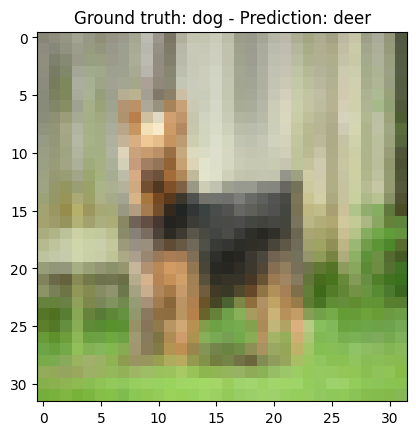

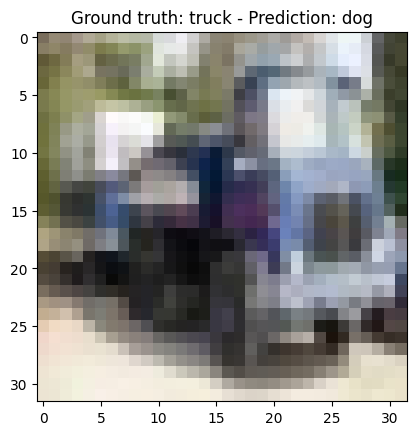

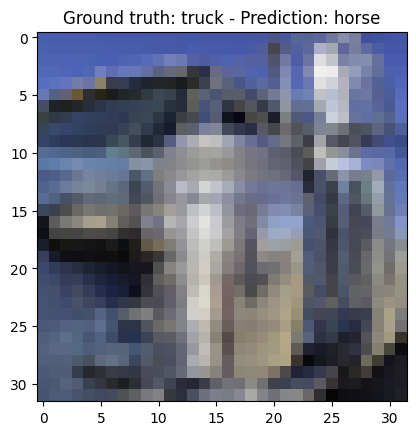

In [11]:
# Aufgabe 6
# ##################################################################################################

for i in range(5):
    img, label, pred = wrong_top_3[i]
    img = img / 2 + 0.5 # unnormalize the tensor to an image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f'Ground truth: {classes[label]} - Prediction: {classes[pred]}')
    plt.show()

    # Write the image to tensorboard
    writer.add_image(f'GT: {classes[label]} PRED: {classes[pred]}', img, i)

In [13]:
# ##################################################################################################
# Aufgabe 7
# ##################################################################################################
%tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 64811), started 0:07:59 ago. (Use '!kill 64811' to kill it.)